In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving eseiaat1.jpg to eseiaat1.jpg
User uploaded file "eseiaat1.jpg" with length 21645 bytes


In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving eseiaat2.jpg to eseiaat2.jpg
User uploaded file "eseiaat2.jpg" with length 19802 bytes


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving vallparadis.jpg to vallparadis.jpg
User uploaded file "vallparadis.jpg" with length 89646 bytes


In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

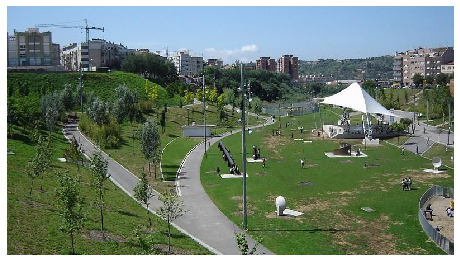

In [8]:


img = plt.imread('vallparadis.jpg')

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

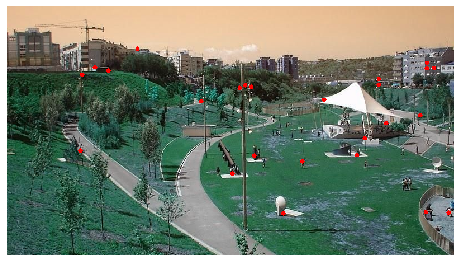

(<matplotlib.image.AxesImage at 0x7feae2b77898>, None)

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('vallparadis.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),4,255,-1)
    
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.imshow(img),plt.show()

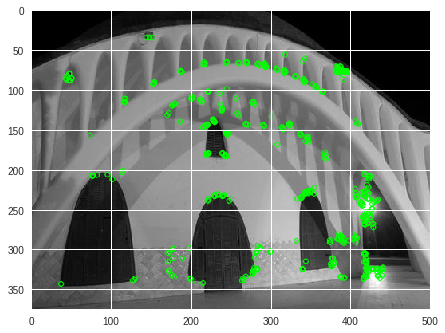

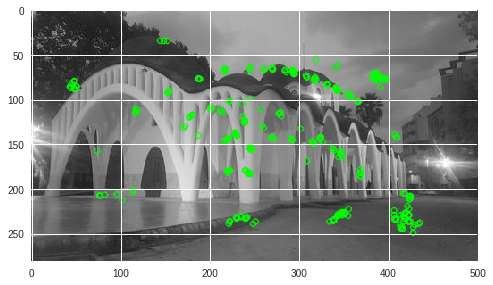

(<matplotlib.image.AxesImage at 0x7feae07784a8>, None)

In [11]:

# Initialize ORB detector
orb = cv2.ORB_create()

# Read the image from OpenCV
img1 = cv2.imread('eseiaat1.jpg',0)
img2 = cv2.imread('eseiaat2.jpg',0)

# Detect the keypoints
kp1 = orb.detect(img1,None)
kp2 = orb.detect(img1,None)

# compute the descriptors with ORB
kp1, des1 = orb.compute(img1, kp1)
kp2, des2 = orb.compute(img2, kp2)

# draw only keypoints location,not size and orientation
img_with_keypoints = cv2.drawKeypoints(img1,kp1,color=(0,255,0),flags=0,outImage=np.array([]))
plt.imshow(img_with_keypoints),plt.show()
img_with_keypoints = cv2.drawKeypoints(img2,kp2,color=(0,255,0), flags=0, outImage=np.array([]))
plt.imshow(img_with_keypoints),plt.show()



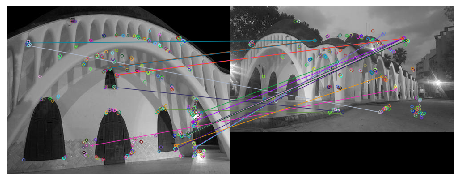

In [12]:
# Compute the matches between the two images
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)
matches = sorted(matches,key=lambda val: val.distance)

# Show the matches
img_out = cv2.drawMatches(img1, kp1,img2, kp2, matches[:20], None)

plt.imshow(img_out)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()